# Non traditional use of coordinates
<div class="alert alert-block alert-info">
ℹ️ The procedure can be used for daily cycles, annual cycles, but also tidal cycles.
</div> 

In [1]:
import Pkg
Pkg.activate("../..")
Pkg.instantiate()
using DIVAnd
using Statistics
using Makie, CairoMakie

  Activating project at `~/Projects/Diva-Workshops`


## Observations
Imagine a signal as the following

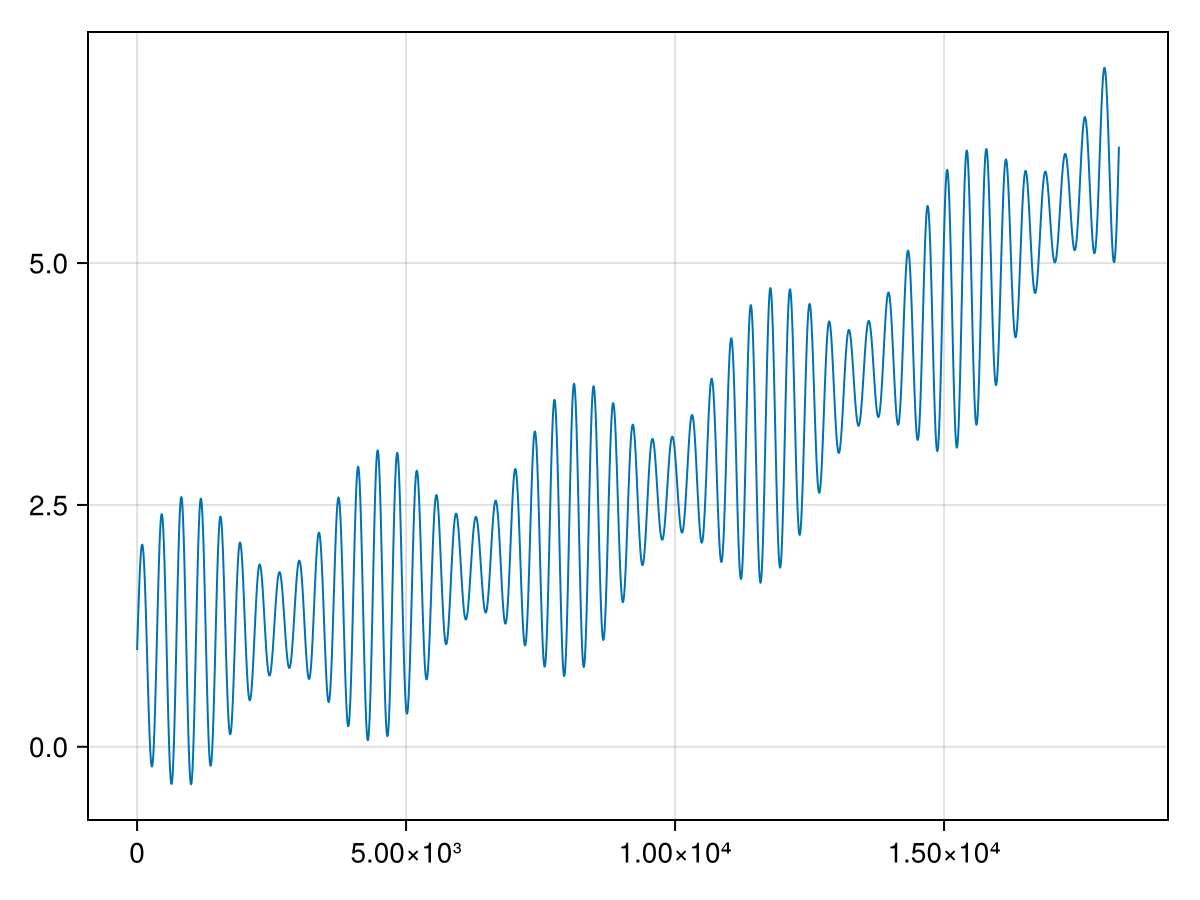

In [2]:
years = 50
samplingdistance = 1
t = collect(0:samplingdistance:365*years);
f = (1 .+ 0.5 .* sin.(2 * pi .* t / 3600.0)) .* sin.(2 * pi .* t ./ 365) + exp.(t / 10000.0)

ff = f
tf = t
lines(t, f, linewidth = 1)

But which you sample only marginally

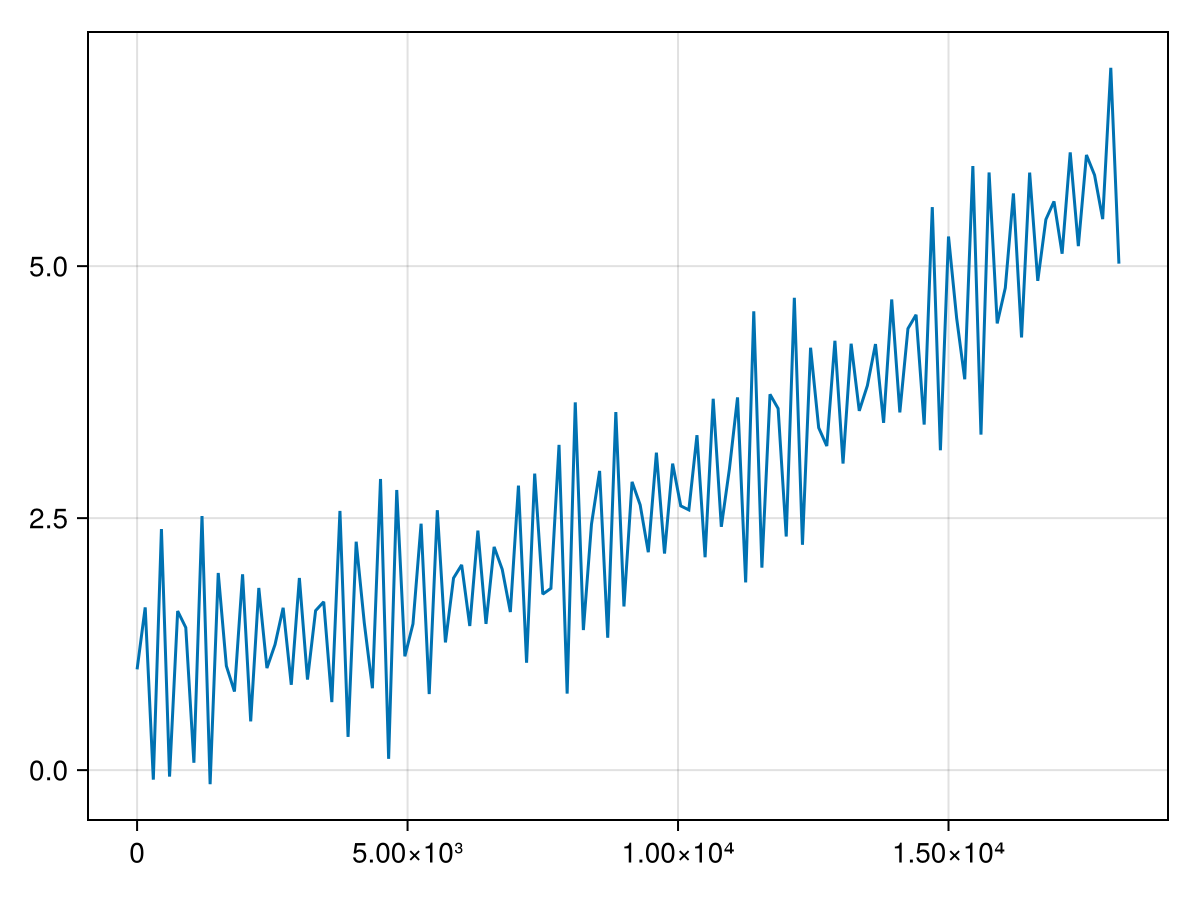

In [3]:
samplingdistance = 150
t = collect(0:samplingdistance:365*years);

f = (1 .+ 0.5 * sin.(2 * pi * t / 3600.0)) .* sin.(2 * pi * t / 365) + exp.(t / 10000.0)
lines(t, f)

To which you add some noise

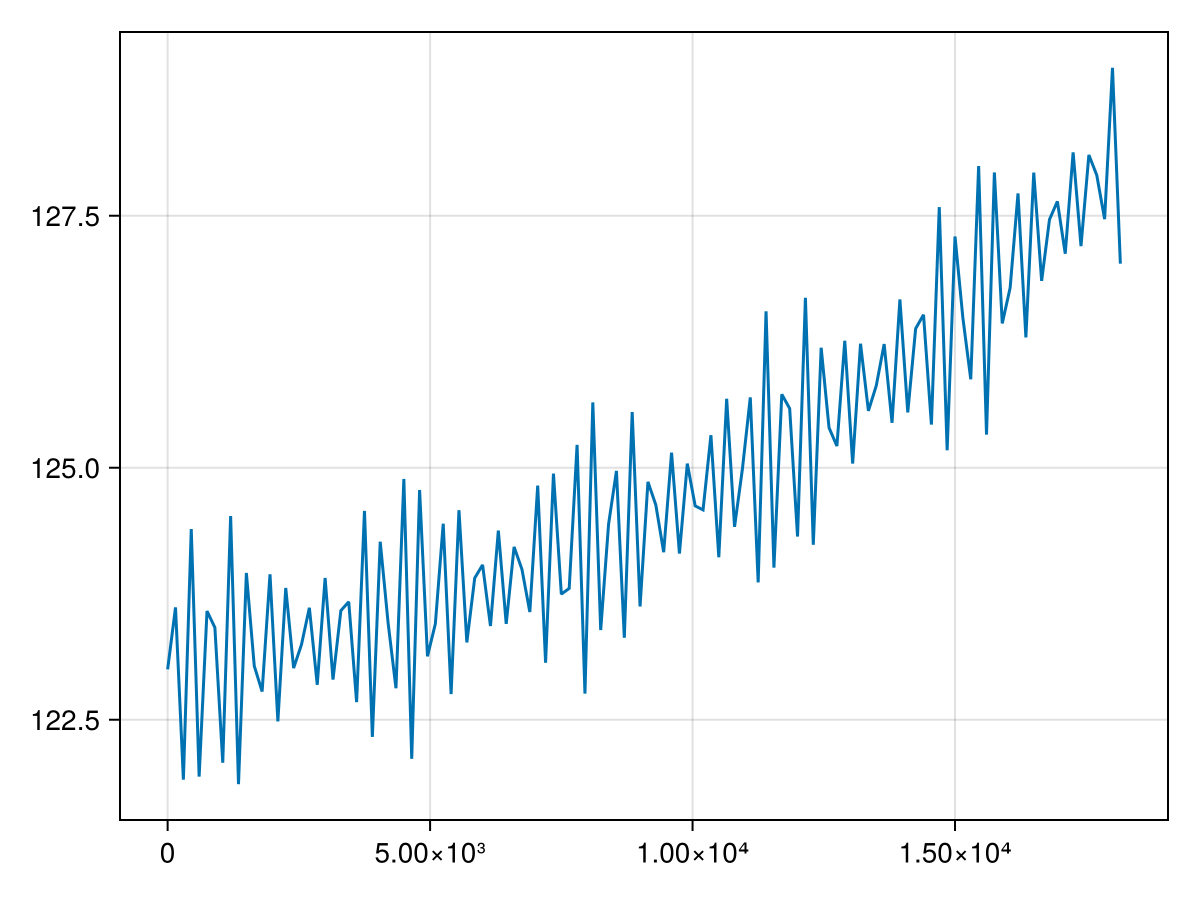

In [4]:
f = f .+ rand(size(f));
lines(t, f)

If you KNOW there is a periodic signal with KNOWN period use a new coordinate

In [5]:
t1 = mod.(t, 365);

Now analyse in the (t,t1) space ! Length scale for t: 1000 and for t1: 100. And force periodicity in t1.

In [6]:
xiii, yiii = ndgrid(range(0, years * 365, length = years + 1), range(0, 365, length = 2));
pm2 = ones(size(xiii)) / (xiii[2, 1] - xiii[1, 1]);
pn2 = ones(size(xiii)) / (yiii[1, 2] - yiii[1, 1]);

In [7]:
# xi,yi = ndgrid(range(0,years*365,length=years+1),range(0,365,length=2))
mask, (pm, pn), (xi, yi) =
    DIVAnd_rectdom(range(0, years * 365, length = years), range(0, 365, 366))

@time fi, s = DIVAndrun(
    mask,
    (pm, pn),
    (xi, yi),
    (t, t1),
    f .- mean(f),
    (1000.0, 100.0),
    0.5;
    moddim = [0, 365],
);

 19.605726 seconds (35.80 M allocations: 1.997 GiB, 5.43% gc time, 96.02% compilation time)


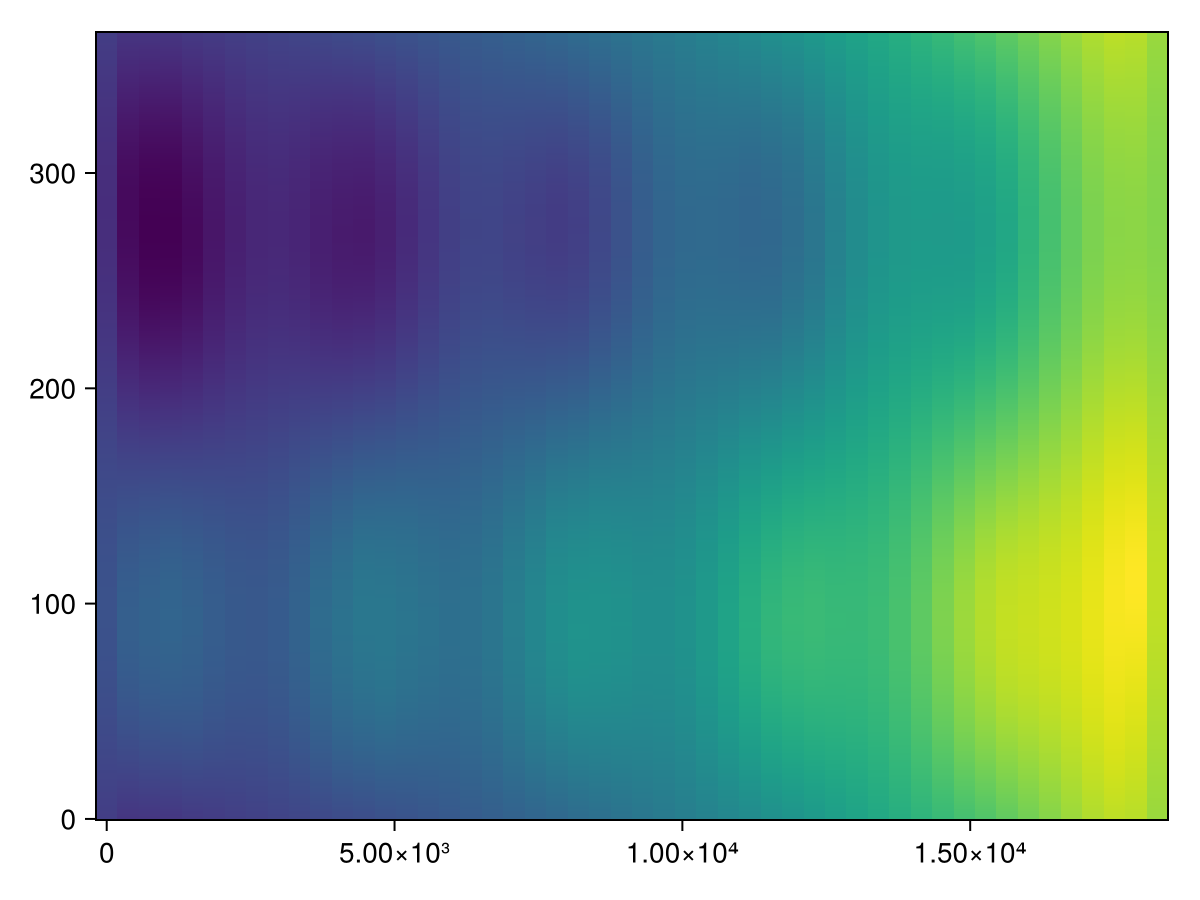

In [8]:
heatmap(xi[:, 1], yi[1, :], fi)

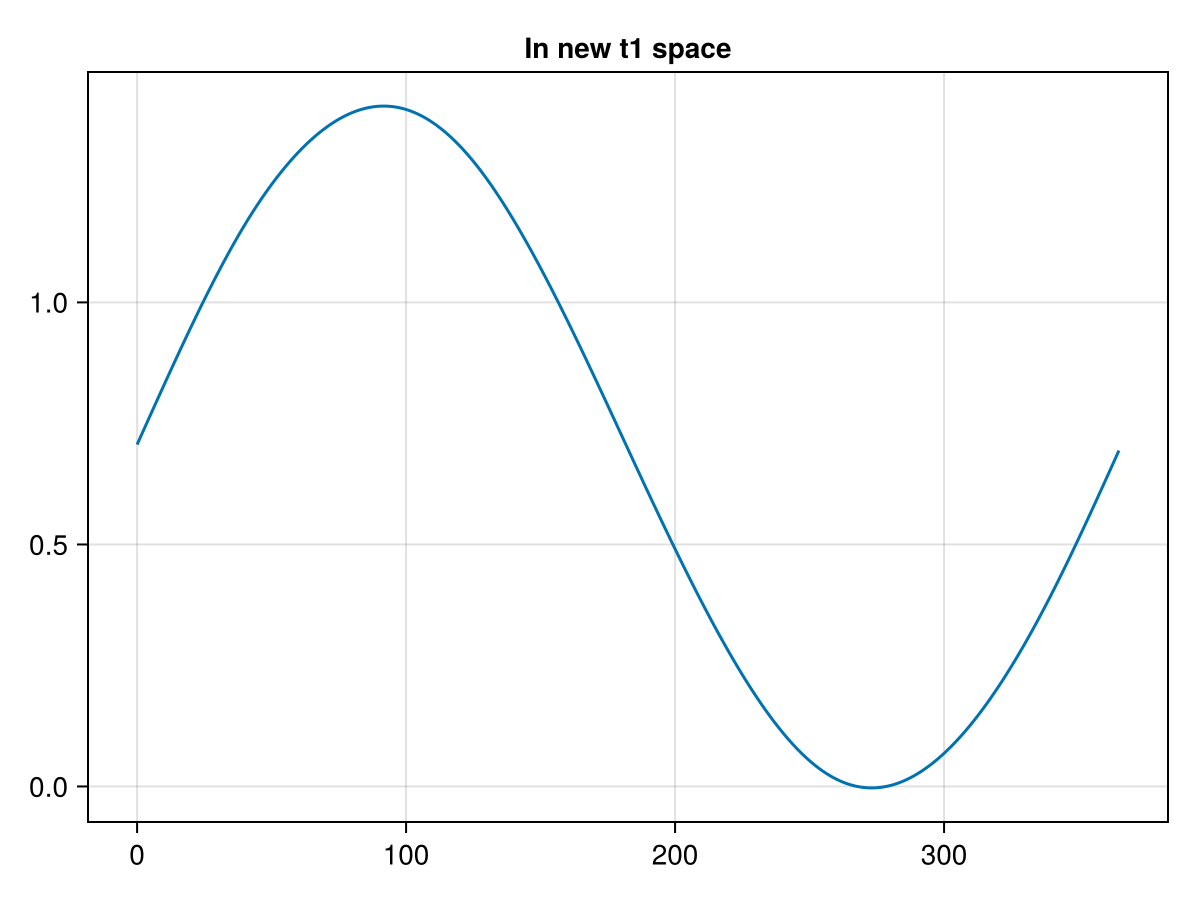

In [9]:
fig = Figure()
ax = Axis(fig[1, 1], title = "In new t1 space")
lines!(ax, yi[1, :], fi[35, :])
fig

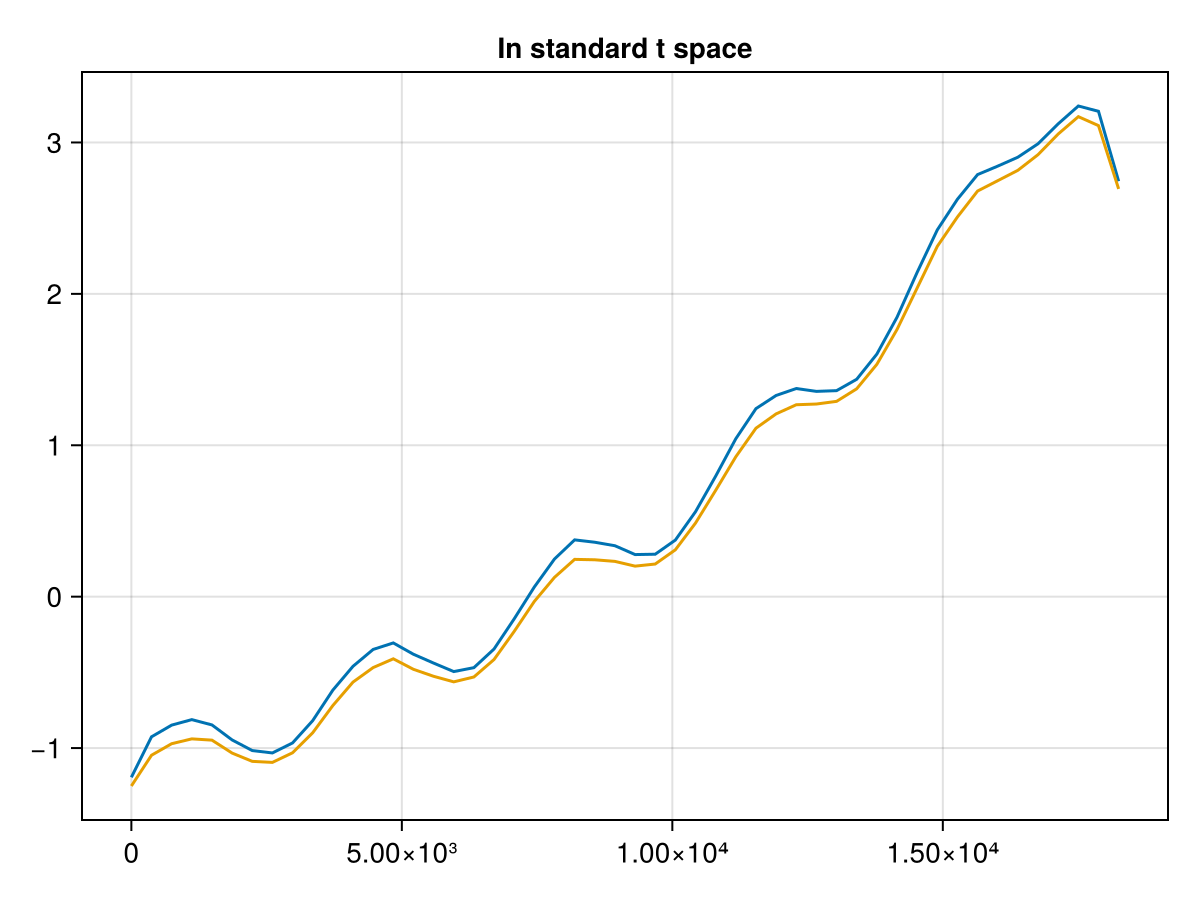

In [10]:
fig = Figure()
ax = Axis(fig[1, 1], title = "In standard t space")
lines!(ax, xi[:, 70], fi[:, 70])
lines!(ax, xi[:, 55], fi[:, 55])
fig

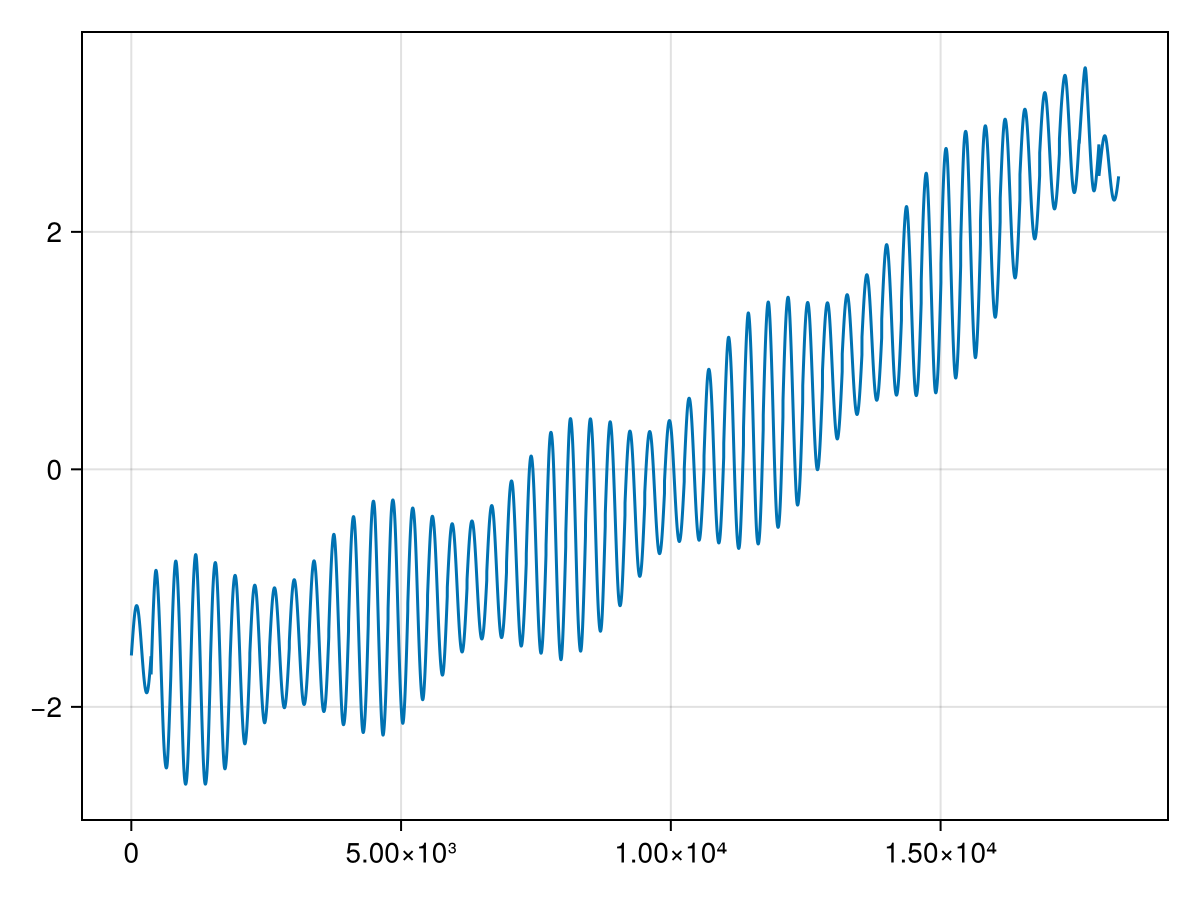

In [11]:
lines(reshape(fi', 50 * 366))

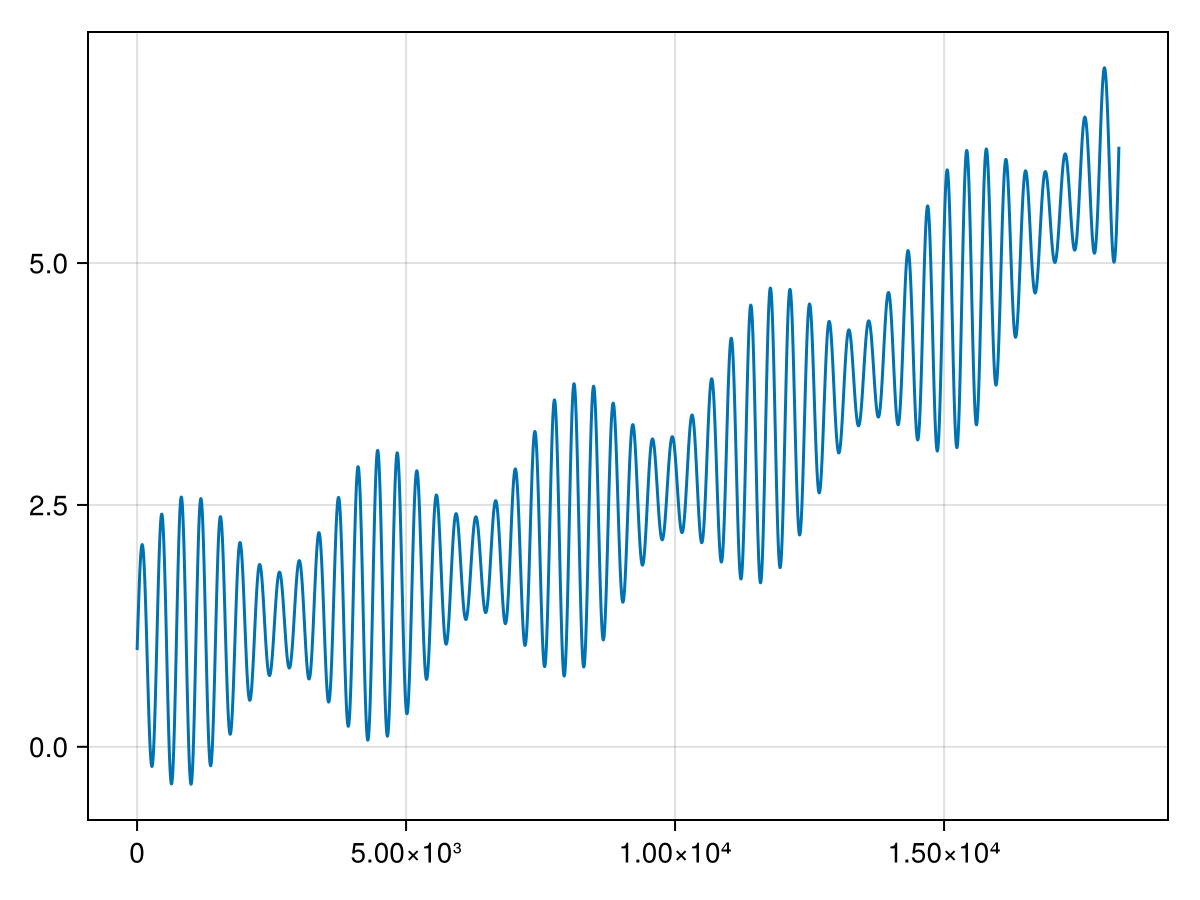

In [12]:
lines(tf, ff)